<div style="text-align: center; margin: 50px">

<h1 style="color: black; background-color: grey; text-align: center;"> Cyber week @IITR </h1>
<h3>Introduction to lattices with fpylll </h3>
<h3>Prepard by: Ali Raya & Vikas Kumar <h3>

# Overview

1. [Introduction](#intro) <br>
    1.1 [Tutorial layout](#layout) <br>
2. [Steps of our experiment](#steps) <br>
    2.1 [Step 1: Build the basis](#step1) <br>
    2.2 [Step 2: Calculate Gram–Schmidt for the orginal basis](#step2) <br>
    2.3 [Step 3: Check the norms of the Gram-Schmidit for the orginal basis(any pattern)](#step3)  <br>
    2.4 [Step 4: Apply lattice reduction algorithm](#step4)  <br>
        2.4.1  [LLL](#step4.1)  <br>
        2.4.2  [BKZ](#step4.2) <br>
3. [Root-Hermite factor and GSA](#GSA)



<a id="intro"> </a>
### Introduction

**Lattice( Definition 1)**: Let $v_1, v_2, \ldots , v_n \in \mathbb{R}^m$ be a set of linearily independent vectors. 

The lattice $\mathcal{L}$ generated by $v_1, v_2, \ldots v_n$ is the set of linear combinations of $v_1, v_2, \ldots, v_n$ with coefficients in $\mathbb{Z}$.

$$\mathcal{L} = \{ a_1v_1 + a_2 v_2 + \ldots a_nv_n: a_1, a_2, \ldots a_n \in \mathcal{Z} \}$$

A basis for $\mathcal{L}$ is any set of independent vectors that generates $\mathcal{L}$.

For convenience, we denote the basis as a matrix $B$ of dimension $n \times m$, where the row $i$ in the matrix corresponds to the coefficients of the vector $i$ in the basis.

There are infinitely many bases to define a lattice with a dimension greater than 2.

Let $B$ and $B^\prime$ be two basis matrices for a lattice $\mathcal{L}$. Then $B^\prime = U B$ where $U$ is an $n \times n$ matrix such that $det(U)=\pm 1$.

**Lattice( Definition 2)**: a subset of $\mathbb{R}^m$ is a lattice if and only if it is a discrete additive subgroup.

Let $\mathcal{L}$ be a lattice in $\mathbb{R}^m$ of rank $n$ with basis matrix $B$. Then $det(\mathcal{L})= \sqrt{det(BB^T)}$. For a full rank lattice(i.e., $n=m$) $det(\mathcal{L})= |det(B)|$.


**Hard problems of lattices**

***The Shortest Vector Problem (SVP)***: Find a shortest nonzero vector in a lattice $\mathcal{L}$, i.e., find a nonzero vector $v \in \mathcal{L}$ that minimizes the Euclidean norm $\lVert v \rVert$.

***The Closet Vector Problem( CVP)***: Given a vector $w \in \mathbb{R}^m$ that is not in $\mathcal{L}$, find a vecotr $v \in \mathcal{L}$ that is the closet to $w$, i.e,. find a vector $v \in \mathcal{L}$ that minimizes the Euclidean norm $\lVert w-v \rVert$.

There are relaxed variants of the previous problems that don't ask for finding the shortest(the closest) vector ever, but the shortest(the closest) up to an approximation factor $\gamma$.

**Gaussian Heuristic (Definition)**: let $\mathcal{L} $ be a full rank lattice generated by the basis matrix $B$, then the gaussian expected length of a shortest vector $\mathcal{L}$ is 

$$\sigma({\mathcal{L}})= \sqrt{\frac{n}{2\pi e}}(det(\mathcal{L}))^{1/n}$$.

For detailed definitions and related results refer to an introduction to mathematical cryptography [chapter 6](https://link.springer.com/chapter/10.1007/978-0-387-77993-5_6)

**[SVP challenge](https://www.latticechallenge.org/svp-challenge/)** 

In 2008 the team at TU Darmstadt introduced the Lattice Challenge. The website offers the possibility to download lattices and challenge the participant to find a vector of Euclidean length smaller than a specified bound. Later on, other challenges have been introduced like the SVP challenge that challenge the participant to find vectors in so-called random (Goldstein-Mayer) lattices. Ideal lattices and LWE challenges have been introduced as well.

In this tutorial, we deal with lattices downloaded from the SVP challenge.


<a id="layout"></a>

### Layout

In this tutorial, we aim to understand the behavior of lattice reduction algorithms on random lattices. 
The ultimate goal is to understand the Geometry Series Assumption (GSA).

For this purpose, we follow the following steps:

- Download a random basis for a lattice from the SVP challenge.
- Read the basis from the downloaded file.
- Calculate Gram-Schmidit orthogonalization for the basis.
- Apply LLL as a lattice reduction algorithm.
- Calculate the Gram-Schmidit orthogonalization again.
- Apply BKZ with some blocksize as a lattice reduction algorithm.
- Calculate the Gram-Schmidit orthogonalization again!!.
- Conclude Hermite-factor and GSA :).

In the series of our tutorial, we depend on the [fpylll](https://fpylll.readthedocs.io/en/latest/modules.html) as a python wrapper to [fplll](https://github.com/fplll/fplll) library.

In [1]:
import tempfile
from fpylll import IntegerMatrix

<a id="steps"></a>
#  2. Steps for our experiment
We will now follow the steps one-by-one.

<a id="step1"></a>
## 2.1 Step 1: build the basis

We download a basis from the SVP challenge of dimension $40$, we save the txt file in the same directory and then we import the basis from the file.

In [2]:
fn = 'SVPchallenge.txt' ##filename
B = IntegerMatrix.from_file(fn)
#print(B[0])

## Task
Write a procedure that can automatically read and download challenges from the website. i.e., automatically read challenges from the website without downloading them manually.


In [3]:

#### Solution

<a id="step2"></a>
## 2.2 Step 2: Calculate Gram–Schmidt for the basis



***Definition:*** An orthogonal basis for a vector space $V$ is a basis $v_1, v_2, \ldots, v_n$ with the property that $$v_i.v_j=0 \text{ for all } i \neq j.$$

The basis is orthonormal basis if in addition $\lVert v_i \rVert =1$  for all  $i\neq j.$


There are many formulas that become much simpler using orthogonal or orthonormal basis. In particular, if $v_1, v_2, \ldots, v_n$ is a linear combination of the basis vectors, then
\begin{align*} 
\lVert v \rVert^2 &= \lVert a_1v_1 + a_2v_2 + \ldots a_n v_n \rVert^2\\ 
&= (a_1v_1+ a_2v_2+ \ldots v_n)(a_1v_1+ a_2v_2+ \ldots v_n) \\
&= \sum_{i=1}^{n}{\sum_{j=1}^{n}{a_i.a_j(v_i.v_j)}} \\
&= \sum_{i=1}^{n}{a_i^2 \lVert v_i \rVert^2} \text{ since } v_i.v_j =0 \text{ for }  i\neq j
\end{align*}

If the basis is orthonormal, then this further simplifies to $\lVert v \rVert^2 = \sum{a_i^2}$

***Procedure:*** (Gram-Schmidit Algorithm)

Let $v_1, v_2, \ldots, v_n$ be a basis for a vector space $V \subset \mathbb{R}^m$. The following algorithm creates an orthogonal basis $v_1^*, v_2^*, \ldots v_n^*$ for $V$:


1. $\text{ Set } v_1^* = v_1.$  <br>
2. $\text{ Loop } i=2,3, \ldots , n.$  <br>
    2.1 $\text{ Compute} \mu_{i,j}= \frac{v_i.v_j^*}{\lVert v_j^* \rVert^2} \text{ for } 1 \leq j < i.$ <br>
    2.2 $\text{ Set } v_i^* = v_i - \sum_{j=1}^{i-1}{\mu_{ij} v_j^*}$ <br>
3. End loop


Span {$v_1, v_2, \ldots, v_n$} = Span{$v_1^*, v_2^*, \ldots v_n^*$}


**Definition.** Let $v_1^*, v_2^*, \ldots v_n^*$ be the Gram-Schmidit basis associated with a lattice $\mathcal{L}$ generated from the basis B = $v_1, v_2, \ldots, v_n$, then the vloume of the lattice is calculated as:

$$ det(\mathcal{L}(B)) = Vol(\mathcal{F}) = \prod_i{\lVert v_i^* \rVert}$$

In [4]:
from fpylll import GSO
#refer to : 1. https://fpylll.readthedocs.io/en/latest/modules.html#module-fpylll.fplll.gso
#           2. https://buildmedia.readthedocs.org/media/pdf/fpylll/latest/fpylll.pdf
# for detailed documentation
from fpylll import FPLLL



In [5]:
float_type="d"

In [6]:
M = GSO.Mat(B, float_type = float_type, U = IntegerMatrix.identity(B.nrows, int_type=B.int_type), UinvT = IntegerMatrix.identity(B.nrows, int_type=B.int_type))

#### Print Mu values, what do you notice?

In [7]:
for i in range(B.nrows):
    for j in range(B.nrows):
        print(M.get_mu(i,j))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


## Why? &#x1F914; &#x1F914;
 GSO module is lazy module, i.e., postpone some computations till the accurate time to do the computations. So, if you want to notice some results, you have to update the explicity.

In [8]:
M.update_gso()

False

In [9]:
FPLLL.get_precision()

53

## Why False? &#x1F914; &#x1F914; &#x1F914;
### Precison is not enough &#x1F605;
Since we have downloaded a matrix from the SVP challenge, and as you can notice the entries are really large numbers so we have to increase the floating point precision. So that 

In [10]:
float_type ="mpfr"
FPLLL.set_precision(900)
M = GSO.Mat(B, float_type = float_type, U = IntegerMatrix.identity(B.nrows, int_type=B.int_type), UinvT = IntegerMatrix.identity(B.nrows, int_type=B.int_type))

In [11]:
M.update_gso()

True

In [12]:
print(M.U)

[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [13]:
### M.get_mu(i,j) gives the mu values associated with the lattice
### M.get_r(i,i) gives the ||v_i^*||^2 (the square of the norm), check that the det of the lattice is the multiplication 
### of the norm of ||v_i^*||

In [14]:
###Check

<a id="step3"></a>
## 2.3 Step 3: Check if the norms of the Gram-Schmidit basis follow any pattern


In [15]:
for i in range(B.nrows):
    print(sqrt(M.get_r(i,i)))

2.1164030823718696e+120
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


### Not very interesting yet!! &#x1F611;

<a id="step4"></a>
## 2.4 Step 4: Apply lattice reduction to the basis


<a id="step 4.1"></a>
### 2.4.1 LLL 

In [16]:
from fpylll.algorithms.bkz2 import BKZReduction

In [17]:
## Create GSO object, I am creating a copy of B and pass it to the function so that I can do the check for M.U*B = M.B
M = GSO.Mat(copy(B), float_type = float_type, U = IntegerMatrix.identity(B.nrows, int_type=B.int_type), UinvT = IntegerMatrix.identity(B.nrows, int_type=B.int_type))
##no need to update now

bkz = BKZReduction(M) ###create an object of BKZreduction

bkz.lll_obj() ### apply LLL algorithm for lattice reduction
## At this point the matrices U and M have been updated.

In [18]:
### Check the determinant of the lattice
U_z = M.U.to_matrix(matrix(ZZ, B.nrows, B.ncols))
U_z_inv = M.UinvT.to_matrix(matrix(ZZ, B.nrows, B.nrows)) ##It returns the transpose of the inverse matrix
U_z_inv_T = U_z_inv.transpose()

In [19]:
print(M.B)

[ -387 -143 -798  104 -138  102  170  348 -485 -152 -185  389  712  210  -20 -179  418   27  228 -124  130  397 -598 -132 -132  397  156 -157  300  -304  -49  132  -30 -254 -493  355 -127    1 -240   -9 ]
[ -400  396 -235  -46  431  330   97 -322  316 -392 -453  172  393 -173  207   68  471  340  217  156  248  493   45  360 -278  -49  168   39  448  -441 -306  326   84 -716 -366  171 -550   67  112    5 ]
[   55  502  333   59  324  106  -47   83  421  185  177  111  -80 -138   86   40   92 -176  -29 -140   81  475  311  141 -109  107  255  874  606   215 -428 -129 -150 -456  283 -168  -50 -875  332   36 ]
[  128 -258  194   -3 -625 -439   60  224  239  186   88  132 -308  112  255   84 -148 -405 -286  407 -118 -169  -20  699  367  438 -218 -359 -657  -104  192   38  569  843  -11  310  581  125  325  -28 ]
[ -408 -300  132 -170  494  346  146 -148  111  480 -254 -457  380 -371  204  -91  331  377 -113 -265    3   30 -668 -222 -636   25  162 -362  590   178 -430 -594 -135 -133   22 -1

In [20]:
print(U_z)

[  396  -143  -798   104  -138   102   170   348  -485  -152  -185   389   712   210   -20  -179   418    27   228  -124   130   397  -598  -132  -132   397   156  -157   300  -304   -49   132   -30  -254  -493   355  -127     1  -240    -9]
[ -280   396  -235   -46   431   330    97  -322   316  -392  -453   172   393  -173   207    68   471   340   217   156   248   493    45   360  -278   -49   168    39   448  -441  -306   326    84  -716  -366   171  -550    67   112     5]
[-1099   502   333    59   324   106   -47    83   421   185   177   111   -80  -138    86    40    92  -176   -29  -140    81   475   311   141  -109   107   255   874   606   215  -428  -129  -150  -456   283  -168   -50  -875   332    36]
[-1077  -258   194    -3  -625  -439    60   224   239   186    88   132  -308   112   255    84  -148  -405  -286   407  -118  -169   -20   699   367   438  -218  -359  -657  -104   192    38   569   843   -11   310   581   125   325   -28]
[ 1016  -300   132  -170   494  

In [21]:
print(U_z.det())
print(U_z_inv_T.det())
print(M.U*B == M.B)
print(U_z*U_z_inv_T)

-1
-1
True
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 

### Let's print the norms of the Gram-Schmidit of the reduced basis and check them.

In [22]:
for i in range(B.nrows):
    print(sqrt(M.get_r(i,i)))

1936.894421490237
1821.7893705076247
1774.927356550093
1786.1997122761497
1771.67614212821
1912.4810062208408
1788.9681559397802
1631.777684183562
1583.7071155203491
1429.8349617945169
1383.4083698440907
1372.8251146184755
1297.0237650974168
1250.7251789138945
1355.7409762282116
1307.644262267052
1232.518069187748
1116.1527931681783
1060.099478865112
1051.6793414946394
1069.6828437439653
968.210544215349
998.3085404600405
962.9217828565263
933.894577452389
821.9652005672439
815.1673297957698
726.6279293473604
730.297007488575
706.0225707779515
642.4018848577458
610.4110978651502
658.1538930897257
619.8236854407346
619.1027647765001
607.8137226256629
542.1214337492244
508.1719399715217
511.2521476668768
509.5417376695526


### Any observation? &#x1F914;

### Check that the multiplication is giving the same determinent

In [23]:
t = 1
for i in range(B.nrows):
    t = t*sqrt(M.get_r(i,i))
print("The det: ", t)

The det:  2.1164030823718702e+120


At this point, remember that M is holding B the basis that is LLL reduced.

### 2.4.2 BKZ with some blocksize


In [24]:
from fpylll import BKZ as BKZ_FPYLLL

In [25]:
FPLLL.get_precision()

900

In [26]:
blocksize = 20
par = BKZ_FPYLLL.Param(blocksize, strategies=BKZ_FPYLLL.DEFAULT_STRATEGY, max_loops = 8) ##Parameters 
bkz(par)  ###same object which hold M

True

In [27]:
print(M.B)

[  131 -393   49 -334  259 -172  434 -239 -296  -69 -256   -8   44 -130  153 -313  424  595 -129 -210   27  -105   64  -67  104  -27  265 -683  504  351 -313   -2 -239  381  131  198   12   128  262  115 ]
[  123 -290 -123  303 -284  702 -403  -97  206 -186   38 -197 -146   -6  194 -117  292 -345  400  -39 -221   -22 -393  190 -252 -289  317   57  149 -606  482   12  267  154  182  224  324  -531 -145   26 ]
[  -10  183   10  242 -284 -266 -330  -25  584  172  234  576  168 -443 -315  713 -490 -141 -112  -28 1043   290  -13  198  288  -25  -68  285 -298 -144 -487   45 -145 -385 -123   16  161    57  -69 -210 ]
[ -313   93 -133  404  168   35 -158 -388  215  -86    5 -143  205 -329 -202  241   53   -4   99  449  976   158  -62  180   66   60 -108  850  107 -230 -248   47 -205 -262  346 -263 -424  -382  308  112 ]
[  254   -6 -105 -139  -57 -206  201  194  -59 -434  127 -171  139   88 -189   65  462  152    7   78 1028  -142  -70    3  415  161  434  233  495 -155 -243   82  246  510  61

In [28]:
for i in range(B.nrows):
    print(sqrt(M.get_r(i,i)))

1709.173484465518
1731.124773613051
1732.0676304957638
1638.7061813219889
1527.906457579578
1568.2284267778819
1511.9601053990077
1520.735431973277
1414.8429340632663
1392.0864642549284
1316.3798877697827
1247.4958549028909
1185.2714485371444
1218.0569305345707
1154.0715452574323
1190.5396789357967
1082.893287210505
1134.949430831114
1141.9226658670634
1123.693635884341
1054.5007209799483
1014.9522592592278
978.8387082328136
919.4237767760329
864.9861193668119
858.3486649243566
854.9356893985218
807.4182504046198
802.7346866427197
749.3427571832059
758.4448724074008
719.9295929481448
683.1187802941147
637.3762841902522
684.859524845601
624.6602829893646
660.9433209424786
645.6260656743322
589.6600584654923
594.8930722783351


### Check the determinent again !!!

In [29]:
t = 1
for i in range(B.nrows):
    t = t*sqrt(M.get_r(i,i))
print("The det: ", t)

The det:  2.1164030823718693e+120


Change cell to markdown and enjoy!  :)

<img src="amazed-mouth-open-minion-zoh0imib85l93mj3.webp" width="750" align="center">

<a id="GSA"></a>

# Root-Herimte-factor and GSA


 ***(Root Hermite factor)***
For a full rank reduced lattice $\mathcal{L}(B)$ reduced with a block size $\beta$ such that $\lVert b_1 \rVert \leq \lVert b_2 \rVert \leq \ldots \leq \lVert b_d \rVert$, the ***root Hermite factor*** $\delta$ is defined via $\lVert b_1 \rVert = \delta^d det(\mathcal{L}(B))^{1/d} $ and can be estimated for larger  $\beta$  as 
$$
\delta = \left(\frac{\beta}{2\pi e}(\pi \beta)^{\frac{1}{\beta}}\right)^{\frac{1}{2(\beta-1)}}. 
$$



In [30]:
delta_d = sqrt(M.get_r(0,0))/(t^(1/B.nrows))
delta = delta_d^(1/B.nrows)
print(delta)

1.013015649726808


***(Geometric Series Assumption)***. Let $\mathcal{B}$ be a $BKZ-\beta$ reduced basis of dimension $d$, the Geometric Series Assumption(GSA) estimates that $\lVert{b_i^*} \rVert \approx  \delta^{-2} \lVert{b_{i-1}^*} \rVert $, where $\delta$ is the root Hermite factor.

In [31]:
b = sqrt(M.get_r(0,0))
_BKZ = [b]
_GSA = [b]
for i in range(1,B.nrows):
    _BKZ.append(sqrt(M.get_r(i,i))) ##Saving the actual norms of Gram-schmidt basis
    b = delta^-2*b
    _GSA.append(delta^-2*b)
    

In [32]:
# for i in range(B.nrows):
#     if i==0:
#         print(sqrt(M.get_r(0,0)), "  ", sqrt(M.get_r(0,0)))
#         b = sqrt(M.get_r(0,0))
#     else:
#         b = delta^-2*b
#         print(sqrt(M.get_r(i,i)), "   ", b)

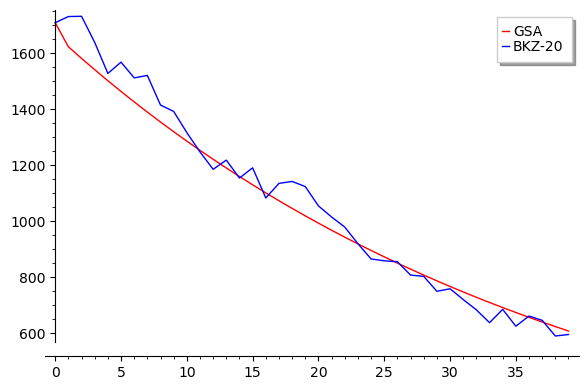

In [33]:
# C = ["#4D4D4D", "#5DA5DA"]
C = ["red", "blue"]
g = line(zip(range(B.nrows), _GSA), legend_label="GSA", color=C[0])
g += line(zip(range(B.nrows), _BKZ), legend_label="BKZ-"+str(blocksize), color=C[1])
g

### Not a bad approximation !

Change cell to markdown and enjoy!  :)

<img src="amazed-speechless-samuel-jackson-70l1od9q0rptef6q.webp" width="750" align="center">

### After introducing NTRU lattices, remember to come back here and repeate all the previous steps
### Write down your observation

The exact blocksize to find a short vector with norm $\lVert v \rVert$ lying in a lattice $\mathcal{L}(B)$ is still an active area of reseach. A few estimator like 2016-estimator briefly states that BKZ with blocksize $\beta$ can retrieve the vector $v$ given that:

$$ \sqrt{\beta/d} \lVert v \rVert < {\delta}^{2\beta-d-1}det(\mathcal{L})^{1/d}
$$

where indicates the root hermite factor. The value of $\beta$ and therfore the hardness of the problem increases with the increase of the lattice dimension
$d$ and the lattice gap $\frac{\lVert v \rVert}{gh(\mathcal{L}(B))}$, where $gh(\mathcal{L}(B))$ refers to the guassian heurestic of the shortest vector in the lattiece under study.

**Basis projection**:
 Let $\mathcal{L}$ be the lattice defined from basis $\mathcal{B} = \left\{ b_1, b_2, \ldots b_n \right\}$; then $\pi_i$ is defined to be the projection on the space orthogonal to the span of $\left\{ b_1, b_2, \ldots b_{i-1} \right\}$. In particular, $\pi_i({b_i}) = {b_i}^*$ and $\pi_i{b_j}$ = 0 for $j<i$.
 
 

**Hermite–Korkine–Zolotarev, Block-Korkine–Zolotarev**.

Let $\mathcal{L}(\textbf{B})$ be the lattice generated from the basis $\textbf{B} = \left\{ b_1, b_2, \ldots b_n \right\}$ and $\mathcal{L}_i^{(k)}$ be a $k-$rank projected lattice generated from $\left\{ \pi_i(b_i), \pi_i(b_{i+1}), \ldots \pi_i(b_{i+k-1})  \right\}$.


 The basis $\textbf{B}$ is Hermite– Korkine–Zolotarev (HKZ) reduced if  $ |{\mu_{i,j}}| \leq 1/2$, for  $1 \leq j <i \leq n$ and  $\lVert b_i^* \rVert= \lambda_1(\mathcal{L}_i^{n-i+1})$ for $1 \leq i \leq n$.

 **Block-Korkine–Zolotarev ($BKZ-\beta$) reduced basis**
 Similarly for a blocksize $\beta$, the basis $\textbf{B}$ is called Block-Korkine–Zolotarev ($BKZ-\beta$) reduced basis if $|{\mu_{i,j}}| \leq 1/2,\text{ for } 1 \leq j <i \leq n$ and  $\lVert b_i^* \rVert = \lambda_1(\mathcal{L}_i^{min(n-i+1, \beta)})$ for $1 \leq i \leq n$. 
    
For $\beta=2$, the reduced basis can be called LLL-reduced. For $\beta>2$, the basis can be called $BKZ-\beta$ reduced basis.